In [1]:
import pandas as pd
import re

In [2]:
df= pd.read_csv('./data/sentence_data.csv')

# Preprocessing

1) Drop all Nan row

In [3]:
#drop all Nan
df.dropna(inplace= True)

In [4]:
df

,index,city,country,Review,sent_list
0,0,Paris,France,No Negative,Negative
1,1,Levallois-Perret,France,No Negative,Negative
2,2,Amsterdam-Zuidoost,Netherlands,really nothing,really nothing
3,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,Location was good
4,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,Have stayed before I e 9yrs ago shop no longer...
...,...,...,...,...,...
1755616,1024936,Amsterdam,Netherlands,Could hear other people shutting doors but di...,Could hear other people shutting doors but did...
1755617,1024938,Vienna,Austria,Hotel is showing signs of wear Room furniture...,Hotel is showing signs of wear
1755618,1024938,Vienna,Austria,Hotel is showing signs of wear Room furniture...,Room furniture was worn and shabby bed amazing...
1755619,1024938,Vienna,Austria,Hotel is showing signs of wear Room furniture...,Probably still worth staying for the location


In [5]:
samples=df.copy(deep=True)
sample=samples[:10000]
sample

,index,city,country,Review,sent_list
0,0,Paris,France,No Negative,Negative
1,1,Levallois-Perret,France,No Negative,Negative
2,2,Amsterdam-Zuidoost,Netherlands,really nothing,really nothing
3,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,Location was good
4,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,Have stayed before I e 9yrs ago shop no longer...
...,...,...,...,...,...
9995,5853,London,United Kingdom,Wonderful hotel I would highly recommend Beau...,fantastic staff and facilities Fantastic locat...
9996,5854,London,United Kingdom,Fairly quiet location Transport links close b...,Fairly quiet location Transport links close by...
9997,5855,Kensington,United Kingdom,Location great Very clean and comfortable,Location great Very clean and comfortable
9998,5856,Chelsea,United Kingdom,Wifi and cell connection was low,Wifi and cell connection was low


2) Removing stopwords and splitting into corpus

In [6]:
from nltk.corpus import stopwords
stop_list = stopwords.words('english')

In [7]:
sample['sent_list']= sample['sent_list'].apply(lambda x: [word for word in x.split() if word not in stop_list])

/Users/jaslynwong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
sample

,index,city,country,Review,sent_list
0,0,Paris,France,No Negative,[Negative]
1,1,Levallois-Perret,France,No Negative,[Negative]
2,2,Amsterdam-Zuidoost,Netherlands,really nothing,"[really, nothing]"
3,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[Location, good]"
4,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[Have, stayed, I, e, 9yrs, ago, shop, longer, ..."
...,...,...,...,...,...
9995,5853,London,United Kingdom,Wonderful hotel I would highly recommend Beau...,"[fantastic, staff, facilities, Fantastic, loca..."
9996,5854,London,United Kingdom,Fairly quiet location Transport links close b...,"[Fairly, quiet, location, Transport, links, cl..."
9997,5855,Kensington,United Kingdom,Location great Very clean and comfortable,"[Location, great, Very, clean, comfortable]"
9998,5856,Chelsea,United Kingdom,Wifi and cell connection was low,"[Wifi, cell, connection, low]"


3) Stemming

In [9]:
df_stem=sample.copy()

In [10]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [11]:
df_stem['sent_list']=df_stem['sent_list'].apply(lambda doc: [stemmer.stem(w) for w in doc])

In [12]:
df_stem

,index,city,country,Review,sent_list
0,0,Paris,France,No Negative,[neg]
1,1,Levallois-Perret,France,No Negative,[neg]
2,2,Amsterdam-Zuidoost,Netherlands,really nothing,"[realli, noth]"
3,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[locat, good]"
4,3,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[have, stay, I, e, 9yr, ago, shop, longer, als..."
...,...,...,...,...,...
9995,5853,London,United Kingdom,Wonderful hotel I would highly recommend Beau...,"[fantast, staff, facil, fantast, locat, food, ..."
9996,5854,London,United Kingdom,Fairly quiet location Transport links close b...,"[fairli, quiet, locat, transport, link, close,..."
9997,5855,Kensington,United Kingdom,Location great Very clean and comfortable,"[locat, great, veri, clean, comfort]"
9998,5856,Chelsea,United Kingdom,Wifi and cell connection was low,"[wifi, cell, connect, low]"


# 4) TF-IDF

# UNIGRAM

# 4.1) Create dictionary

In [13]:
import gensim 
from gensim import corpora

<b> 4.1.1) Create list from dataframe <b>

In [14]:
#df1 stemming only
reviews= df_stem['sent_list']
doc_stem=reviews.values.tolist()
doc_stem

[['neg'],
 ['neg'],
 ['realli', 'noth'],
 ['locat', 'good'],
 ['have',
  'stay',
  'I',
  'e',
  '9yr',
  'ago',
  'shop',
  'longer',
  'also',
  'bar',
  'chang',
  'still',
  'nice'],
 ['neg'],
 ['breakfast', 'option', 'limit'],
 ['person',
  'would',
  'choos',
  'hotel',
  'closer',
  'anoth',
  'safer',
  'subway',
  'station',
  'knew',
  'citi',
  'stay',
  'longer'],
 ['the', 'locat', 'great', 'paddington'],
 ['bed', 'clean'],
 ['the', 'room', 'great', 'size', 'citi', 'hotel'],
 ['the',
  'shower',
  'great',
  'love',
  'old',
  'build',
  'charact',
  'In',
  'perfect',
  'spot',
  'free',
  'tea',
  'coffe',
  'snack',
  'felt',
  'like',
  'happen',
  'weekday',
  'morn',
  'superb',
  'staff',
  'So',
  'help',
  'effici'],
 ['friendli', 'staff', 'locat'],
 ['the', 'room', 'small', 'bathroom', 'minut'],
 ['A', 'bedsid', 'lamp', 'would', 'easier', 'eye', 'ceil', 'spotlight'],
 ['there', 'low', 'level', 'nois', 'outsid', 'room', 'probabl', 'come', 'air'],
 ['condit', 'unit'

<b> 4.1.2) Create dictionary <b>

In [15]:
dict_stem=corpora.Dictionary(doc_stem)

In [16]:
print(dict_stem)

Dictionary(4745 unique tokens: ['neg', 'noth', 'realli', 'good', 'locat']...)


In [17]:
#to see all mappings from tokens to IDs in the dictionary
token_to_id=dict_stem.token2id
print(type(token_to_id))
print(token_to_id)

<class 'dict'>
{'neg': 0, 'noth': 1, 'realli': 2, 'good': 3, 'locat': 4, '9yr': 5, 'I': 6, 'ago': 7, 'also': 8, 'bar': 9, 'chang': 10, 'e': 11, 'have': 12, 'longer': 13, 'nice': 14, 'shop': 15, 'stay': 16, 'still': 17, 'breakfast': 18, 'limit': 19, 'option': 20, 'anoth': 21, 'choos': 22, 'citi': 23, 'closer': 24, 'hotel': 25, 'knew': 26, 'person': 27, 'safer': 28, 'station': 29, 'subway': 30, 'would': 31, 'great': 32, 'paddington': 33, 'the': 34, 'bed': 35, 'clean': 36, 'room': 37, 'size': 38, 'In': 39, 'So': 40, 'build': 41, 'charact': 42, 'coffe': 43, 'effici': 44, 'felt': 45, 'free': 46, 'happen': 47, 'help': 48, 'like': 49, 'love': 50, 'morn': 51, 'old': 52, 'perfect': 53, 'shower': 54, 'snack': 55, 'spot': 56, 'staff': 57, 'superb': 58, 'tea': 59, 'weekday': 60, 'friendli': 61, 'bathroom': 62, 'minut': 63, 'small': 64, 'A': 65, 'bedsid': 66, 'ceil': 67, 'easier': 68, 'eye': 69, 'lamp': 70, 'spotlight': 71, 'air': 72, 'come': 73, 'level': 74, 'low': 75, 'nois': 76, 'outsid': 77, 'p

<b> 4.2) Represent documents into vectors - TF Models <b>

In [18]:
vec_stem= [dict_stem.doc2bow(doc) for doc in doc_stem]

In [19]:
vec_stem

[[(0, 1)],
 [(0, 1)],
 [(1, 1), (2, 1)],
 [(3, 1), (4, 1)],
 [(5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(0, 1)],
 [(18, 1), (19, 1), (20, 1)],
 [(13, 1),
  (16, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1)],
 [(4, 1), (32, 1), (33, 1), (34, 1)],
 [(35, 1), (36, 1)],
 [(23, 1), (25, 1), (32, 1), (34, 1), (37, 1), (38, 1)],
 [(32, 1),
  (34, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(4, 1), (57, 1), (61, 1)],
 [(34, 1), (37, 1), (62, 1), (63, 1), (64, 1)],
 [(31, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)],
 [(37, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78,

<b> Corpus to TF-IDF vectors <b>

In [20]:
from gensim import models

In [21]:
tfidf= models.TfidfModel(vec_stem)
print(tfidf)

TfidfModel(num_docs=10000, num_nnz=57443)


In [22]:
vec_stem_with_tfidf = [tfidf[vec] for vec in vec_stem]

In [23]:
vec_stem_with_tfidf

[[(0, 1.0)],
 [(0, 1.0)],
 [(1, 0.7528689937046816), (2, 0.6581704021893571)],
 [(3, 0.7692219212098245), (4, 0.6389817179937675)],
 [(5, 0.4578886783397841),
  (6, 0.12185479278845633),
  (7, 0.3545100081983756),
  (8, 0.2043506977618936),
  (9, 0.18521401948792218),
  (10, 0.2586655854086862),
  (11, 0.32325896028578943),
  (12, 0.33435245972932703),
  (13, 0.3200504514845728),
  (14, 0.15795601951919666),
  (15, 0.2551754065532417),
  (16, 0.16270625339792769),
  (17, 0.2675491818528338)],
 [(0, 1.0)],
 [(18, 0.3044162177075027),
  (19, 0.6847288223688434),
  (20, 0.6621761141977527)],
 [(13, 0.31068366475415243),
  (16, 0.15794439548391823),
  (21, 0.2715484534037298),
  (22, 0.32876624084057215),
  (23, 0.21070904524229844),
  (24, 0.35057888635705486),
  (25, 0.10391767576908519),
  (26, 0.35801814477191435),
  (27, 0.2664637914121009),
  (28, 0.3914691876184008),
  (29, 0.19152294079196117),
  (30, 0.3137982714298628),
  (31, 0.17613126669620913)],
 [(4, 0.2727594665805298),
  (

# LDA Mallet Model

<b>STEMMING - TF<b>

In [24]:
import gensim
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
import os
os.environ.update({'MALLET_HOME':r'/Users/jaslynwong/Softwares/mallet/mallet-2.0.8/'})

no_topics=10

mallet_path = r'/Users/jaslynwong/Softwares/mallet/mallet-2.0.8/bin/mallet' # update this path


<b>1) LDAMallet with tf vectors<b> - DONT RUN THIS

In [25]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=vec_stem, num_topics=no_topics, id2word=dict_stem)


In [26]:
vecTop_stem= ldamallet.show_topics()
for i in range(0, 10):
    print(vecTop_stem[i])

(0, '0.163*"neg" + 0.052*"bar" + 0.046*"time" + 0.040*"check" + 0.033*"food" + 0.025*"2" + 0.022*"back" + 0.022*"poor" + 0.018*"everi" + 0.017*"3"')
(1, '0.280*"staff" + 0.106*"friendli" + 0.092*"nice" + 0.062*"veri" + 0.053*"realli" + 0.025*"noth" + 0.020*"welcom" + 0.016*"feel" + 0.013*"alway" + 0.012*"attent"')
(2, '0.041*"work" + 0.039*"day" + 0.036*"view" + 0.036*"recept" + 0.033*"area" + 0.028*"room" + 0.017*"pool" + 0.017*"thing" + 0.015*"bad" + 0.013*"cold"')
(3, '0.050*"night" + 0.045*"posit" + 0.038*"book" + 0.036*"bit" + 0.033*"littl" + 0.025*"window" + 0.024*"arriv" + 0.022*"door" + 0.020*"made" + 0.018*"morn"')
(4, '0.212*"room" + 0.121*"bed" + 0.102*"clean" + 0.078*"comfort" + 0.027*"comfi" + 0.024*"size" + 0.020*"extrem" + 0.020*"decor" + 0.018*"big" + 0.017*"spaciou"')
(5, '0.245*"hotel" + 0.083*"stay" + 0.057*"love" + 0.029*"coffe" + 0.027*"london" + 0.019*"4" + 0.018*"tea" + 0.018*"thi" + 0.017*"recommend" + 0.016*"definit"')
(6, '0.043*"close" + 0.042*"restaur" + 0.0

<b>2) LDAMallet with TFIDF vectors<b>

In [27]:
ldamallet_stem_tfidf = gensim.models.wrappers.LdaMallet(mallet_path, corpus=vec_stem_with_tfidf, num_topics=no_topics, id2word=dict_stem)


In [28]:
vecTop_stem_tfidf= ldamallet_stem_tfidf.show_topics()
for i in range(0, 10):
    print(vecTop_stem_tfidf[i])

(0, '0.868*"neg" + 0.044*"everyth" + 0.035*"excel" + 0.009*"express" + 0.009*"recept" + 0.009*"love" + 0.009*"oasi" + 0.009*"unconfort" + 0.009*"arriv" + 0.000*"burnt"')
(1, '0.851*"neg" + 0.026*"night" + 0.009*"room" + 0.009*"fit" + 0.009*"lovat" + 0.009*"cleanli" + 0.009*"stay" + 0.009*"clean" + 0.009*"consequ" + 0.009*"unaccept"')
(2, '0.852*"neg" + 0.008*"perfect" + 0.008*"lift" + 0.008*"interest" + 0.008*"word" + 0.008*"turn" + 0.008*"location" + 0.008*"parcheggio" + 0.008*"tire" + 0.008*"impress"')
(3, '0.939*"neg" + 0.009*"loud" + 0.009*"nice" + 0.009*"fix" + 0.009*"brighter" + 0.009*"courteou" + 0.009*"time" + 0.009*"veget" + 0.000*"flour" + 0.000*"burnt"')
(4, '0.504*"locat" + 0.354*"neg" + 0.024*"noth" + 0.016*"check" + 0.008*"told" + 0.008*"ridicul" + 0.008*"satisfac" + 0.008*"checkout" + 0.008*"fix" + 0.008*"live"')
(5, '0.929*"posit" + 0.010*"money" + 0.010*"problem" + 0.010*"hotel" + 0.010*"honestli" + 0.010*"recept" + 0.010*"quiet" + 0.010*"comfort" + 0.000*"regul" + 0.0

<b>Choose topic for STEMMING<b>

<b>1) Optimal # of topics with tf vectors<b> - DONT RUN THIS

In [54]:
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 10, 2):
    #sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics)
    lda_stem_mallet = gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=vec_stem, num_topics=no_topics, id2word=dict_stem)
    coherencemodel = CoherenceModel(model=lda_stem_mallet, texts=doc_stem, dictionary=dict_stem, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_stem_mallet)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2020-03-13 15:39:38.562253
#Topics: 2 Score: 0.33925488084709465
#Topics: 4 Score: 0.34318471786927746
#Topics: 6 Score: 0.35636625102940234
#Topics: 8 Score: 0.39038418423963755
2020-03-13 15:40:02.998597


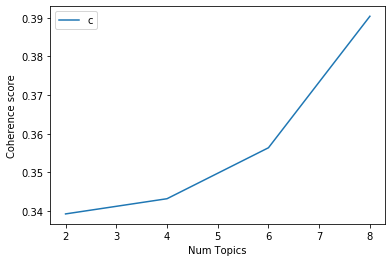

In [57]:
# Show graph

import matplotlib.pyplot as plt

limit=10; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [61]:
# Print the coherence scores
# for m, cv in zip(x, coherence_# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.3393
Num Topics = 4  has Coherence Value of 0.3432
Num Topics = 6  has Coherence Value of 0.3564
Num Topics = 8  has Coherence Value of 0.3904


<b>2) Optimal # of topics with TFIDF vectors<b>

In [29]:
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 10, 2):
    #sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics)
    lda_stem_mallet_tfidf = gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=vec_stem_with_tfidf, num_topics=no_topics, id2word=dict_stem)
    coherencemodel = CoherenceModel(model=lda_stem_mallet_tfidf, texts=doc_stem, dictionary=dict_stem, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_stem_mallet_tfidf)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2020-03-19 01:23:52.758689
#Topics: 2 Score: 0.7147770561826216
#Topics: 4 Score: 0.7218777760289132
#Topics: 6 Score: 0.7117686614424309
#Topics: 8 Score: 0.706353737455161
2020-03-19 01:24:15.298785


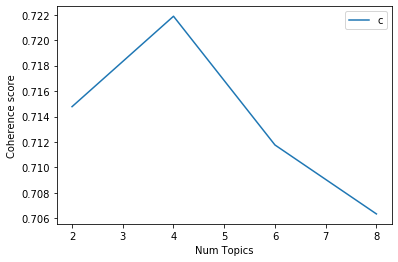

In [32]:
# Show graph

import matplotlib.pyplot as plt

limit=10; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [31]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.7148
Num Topics = 4  has Coherence Value of 0.7219
Num Topics = 6  has Coherence Value of 0.7118
Num Topics = 8  has Coherence Value of 0.7064


# Coherence Score

In [ ]:
# # Compute Perplexity for stemming only
# perplex_stem= lda_reviews_stem.log_perplexity(vec_stem, total_docs=None) #For LDAModel
#   # a measure of how good the model is. lower the better.
    
# print('\nPerplexity for LDAModel: ', perplex_stem)

In [55]:
from gensim.models import CoherenceModel

# Compute Coherence score for stemming -tf only
coherence_model_stem = CoherenceModel(model=lda_reviews_stem, texts=doc_stem, dictionary=dict_stem, coherence='c_v')
coherence_lda_stem = coherence_model_stem.get_coherence()
print('\nCoherence Score LDA-stem: ', coherence_lda_stem)


Coherence Score LDA-stem:  0.3821709297852026


In [33]:
# Compute Coherence score for stemming only - tfidf
coherence_model_stem_tfidf = CoherenceModel(model=lda_reviews_stem_tfidf, texts=doc_stem, dictionary=dict_stem, coherence='c_v')
coherence_lda_stem_tfidf = coherence_model_stem_tfidf.get_coherence()
print('\nCoherence Score LDA-stem: ', coherence_lda_stem_tfidf)


# Most Dominant Topic for each Document

In [34]:
#Find most dominant topic

import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#I choose model_list[1] where the number of topics is 4

#df_topic_sents_keywords = format_topics_sentences(ldamodel=model_list[1], corpus=sg_vecs, data=sg_docs)
df_topic_sents_keywords = format_topics_sentences(ldamodel=model_list[0], corpus=vec_stem, data=doc_stem)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.1024,"neg, posit, lovat, fit, express, partak, local...",[neg]
1,1,1.0,0.1046,"neg, noth, waitress, back, oasi, unconfort, qu...",[neg]
2,2,1.0,0.1176,"neg, noth, waitress, back, oasi, unconfort, qu...","[realli, noth]"
3,3,8.0,0.1154,"locat, neg, courteou, room, renov, unbeliev, l...","[locat, good]"
4,4,6.0,0.1132,"neg, excel, interest, issu, privaci, shower, w...","[have, stay, I, e, 9yr, ago, shop, longer, als..."
5,5,9.0,0.1046,"neg, everyth, standard, money, hotel, case, ma...",[neg]
6,6,4.0,0.1176,"neg, breakfast, narrowli, hotel, satisfac, slo...","[breakfast, option, limit]"
7,7,0.0,0.1111,"posit, check, comfart, recept, sleep, accommod...","[person, would, choos, hotel, closer, anoth, s..."
8,8,8.0,0.1176,"locat, neg, courteou, room, renov, unbeliev, l...","[the, locat, great, paddington]"
9,9,5.0,0.1155,"posit, neg, night, turn, clean, honestli, ridi...","[bed, clean]"


# Save model

In [ ]:
#Save a model to disk, or reload a pre-trained model
lda_mallet_stem_tfidf=ldamallet #Or you can save the best model, model_list[1]

lda_mallet_stem_tfidf.save("lda_mallet_stem_tfidf")

lda_disk=gensim.models.wrappers.LdaMallet.load("lda_mallet_stem_tfidf")